# Part 1: Basic Option Valuation
Carry out convergence studies by increasing
the number of trials. How do your results compare with the results obtained in assignment 1?
Perform numerical tests for varying values for the strike and the volatility parameter. What is
the standard error of your estimate and what does this tell you about the accuracy?

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numba import jit
from scipy import stats

In [63]:
@jit (nopython = True)
def one_step_stock_jit(stock_price, interest_rate, volatility, maturity):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * np.random.normal())

@jit (nopython = True)
def monte_carlo_option_jit(trials, strike_price, stock_price, interest_rate, volatility, maturity):
    # trials are #iterations of monte carlo
    monte_results = []
    for i in range(trials):
        current_monte = one_step_stock_jit(stock_price, interest_rate, volatility, maturity)
        if current_monte - K > 0:
            monte_results.append(current_monte)
        else:
            monte_results.append(0)
        
    return monte_results
    

In [64]:
# @jit (nopython = True)
def one_step_stock(stock_price, interest_rate, volatility, maturity):
    return stock_price * math.exp((interest_rate - 0.5 * volatility ** 2) * maturity + volatility * math.sqrt(maturity) * np.random.normal())

# @jit (nopython = True)
def monte_carlo_option(trials, strike_price, stock_price, interest_rate, volatility, maturity):
    # trials are #iterations of monte carlo
    monte_results = []
    for i in range(trials):
        current_payoff = max(one_step_stock(stock_price, interest_rate, volatility, maturity) - K, 0)
        monte_results.append(current_payoff)
        
    return monte_results

In [67]:
T = 1
K = 99
r = 0.06
S0 = 100
sigma = 0.2

trials = 10000000
import time
time0 = time.time()
monte_results = monte_carlo_option(trials, K, S0, r, sigma, T)
print(time.time() - time0)
# Mean and std
monte_mean = np.mean(monte_results)
monte_std = np.std(monte_results)

  

74.17018342018127


In [68]:
T = 1
K = 99
r = 0.06
S0 = 100
sigma = 0.2

trials = 10000000
time0 = time.time()

monte_results = monte_carlo_option_jit(trials, K, S0, r, sigma, T)
print(time.time() - time0)

# Mean and std
monte_mean = np.mean(monte_results)
monte_std = np.std(monte_results)

  

2.2530510425567627


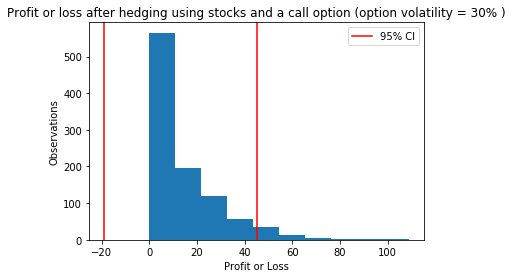

In [33]:
#Payoff kan nooit negatief zijn 

CI95 = stats.norm.interval(0.95, loc = monte_mean, scale = monte_std) 
plt.axvline(CI95[0], color = 'r', label = '95% CI')
plt.axvline(CI95[1], color = 'r')

plt.legend()
plt.hist(monte_results)
plt.ylabel('Observations')
plt.xlabel('Profit or Loss')
plt.title('Profit or loss after hedging using stocks and a call option (option volatility = 30% )')
plt.show()

# Part 2: Estimation of Sensitivities in MC

# Part 3: Variance Reduction